In [1]:
import nltk
import requests
from bs4 import BeautifulSoup
import numpy as np
from PIL import Image
from io import BytesIO
import re
from string import digits
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
from nltk.stem import WordNetLemmatizer 
import seaborn as sns



In [2]:
stopWords=set({"year","rate","last","June","point","wa","basis","index",
               "May","period","level","July","annual","good","monthly",
              "average","month","group","subgroup","first","April"}) 
url = "https://www.tcmb.gov.tr/wps/wcm/connect/EN/TCMB+EN/Main+Menu/Announcements/Press+Releases/2023/ANO2023-24"


In [3]:
def get_cbrt_meeting_summary(url=url):
    """
    Fetches the meeting summary from the given URL using web scraping.

    Parameters:
        url (str): The URL of the webpage containing the meeting summary.

    Returns:
        list: A list of paragraphs containing the meeting summary.
    """
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    return soup.find_all("p", dir="ltr")

summary=get_cbrt_meeting_summary(url=url)
summary



[<p dir="ltr">No: 2023-24</p>,
 <p dir="ltr" style="text-align: right;">3 July 2023</p>,
 <p dir="ltr">Meeting Date: 22 June 2023</p>,
 <p dir="ltr">1.    While global inflation has decreased, it is still above the long-term averages. In the last ten years, the average inflation was 2.2% in advanced economies and 5.6% in emerging economies. In 2023, inflation is expected to be 3.3% in advanced economies and 8.1% in emerging economies. Although the downward trend in commodity prices that started in the middle of last year continues, the current level of the Commodity Price Index is 23.2% above the average of the last ten years. The index decreased by 29.4% compared to the highest level reached in June last year. Similarly, the Agricultural Commodity Price Index, which declined by 22.0% compared to the peak it reached in April last year, is 14.3% above the average of the last ten years. This still has an impact on inflation due to the high share of food in the consumer basket. In 2023, y

In [4]:
def clean_and_merged(input):
    """
    Cleans and merges the paragraphs in the input list.

    This function takes a list of paragraphs as input, and for each paragraph,
    it removes any occurrences of the "\xa0" character (non-breaking space)
    and appends the cleaned paragraph to a new list. The cleaned paragraphs
    are then merged into a single list and returned.

    Parameters:
        input (list): A list of paragraphs to be cleaned and merged.

    Returns:
        list: A list of cleaned and merged paragraphs.
    """
    summary_merged = []
    for i in input:
        i = i.text.replace("\xa0", "")
        summary_merged.append(i)
    return summary_merged

summary_merged=clean_and_merged(summary)
summary_merged



['No: 2023-24',
 '3 July2023',
 'Meeting Date: 22June 2023',
 '1. While global inflation has decreased, it is still above the long-term averages. In the last ten years, the average inflation was 2.2% in advanced economies and 5.6% in emerging economies. In 2023, inflation is expected to be 3.3% in advanced economies and 8.1% in emerging economies. Although the downward trend in commodity prices that started in the middle of last year continues, the current level of the Commodity Price Index is 23.2% above the average of the last ten years. The index decreased by 29.4% compared to the highest level reached in June last year. Similarly, the Agricultural Commodity Price Index, which declined by 22.0% compared to the peak it reached in April last year, is 14.3% above the average of the last ten years. This still has an impact on inflation due to the high share of food in the consumer basket. In 2023, year-end inflation expectations in the USA and the Euro area are 3.0% and 3.8%, respective

In [5]:
def removing_digits(input):
    remove_digits = str.maketrans('', '', digits)
    res = str(input).translate(remove_digits)
    res2 = re.sub(r'[^\w\s]', '', res)
    return res2

remove_digits=removing_digits(summary_merged)
remove_digits


'No   July Meeting Date June   While global inflation has decreased it is still above the longterm averages In the last ten years the average inflation was  in advanced economies and  in emerging economies In  inflation is expected to be  in advanced economies and  in emerging economies Although the downward trend in commodity prices that started in the middle of last year continues the current level of the Commodity Price Index is  above the average of the last ten years The index decreased by  compared to the highest level reached in June last year Similarly the Agricultural Commodity Price Index which declined by  compared to the peak it reached in April last year is  above the average of the last ten years This still has an impact on inflation due to the high share of food in the consumer basket In  yearend inflation expectations in the USA and the Euro area are  and  respectively while core inflation expectations are  and  respectively  High levels of core inflation and inflation 

In [6]:
def lemmatize(input):
    lemmatizer = WordNetLemmatizer()
    word_list = nltk.word_tokenize(input)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output

lemmatized_output=lemmatize(remove_digits)
lemmatized_output




'No July Meeting Date June While global inflation ha decreased it is still above the longterm average In the last ten year the average inflation wa in advanced economy and in emerging economy In inflation is expected to be in advanced economy and in emerging economy Although the downward trend in commodity price that started in the middle of last year continues the current level of the Commodity Price Index is above the average of the last ten year The index decreased by compared to the highest level reached in June last year Similarly the Agricultural Commodity Price Index which declined by compared to the peak it reached in April last year is above the average of the last ten year This still ha an impact on inflation due to the high share of food in the consumer basket In yearend inflation expectation in the USA and the Euro area are and respectively while core inflation expectation are and respectively High level of core inflation and inflation expectation imply that global inflatio

In [7]:
def tokenize_and_tagged(input):
    tokens = nltk.word_tokenize(input)
    tagged = nltk.pos_tag(tokens)
    tagged=pd.DataFrame(tagged)
    tagged=tagged[tagged[1].str.startswith("JJ")|tagged[1].str.startswith("N")]
    return tagged

tagged=tokenize_and_tagged(lemmatized_output)
tagged


,0,1
1,July,NNP
2,Meeting,NNP
3,Date,NNP
4,June,NNP
6,global,JJ
...,...,...
3179,decision,NN
3182,predictable,JJ
3183,datadriven,NN
3185,transparent,NN


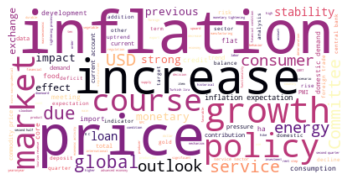

,0
inflation,54
price,42
point,34
rate,30
increase,29
...,...
zone,1
earthquake,1
show,1
reveals,1


In [8]:
def word_cloud(string):
    plt.axis("off")
    plt.imshow(WordCloud(background_color="white", stopwords=stopWords,colormap="magma").generate(string), interpolation="bilinear")
    plt.show()

a=re.sub(r'[^\w\s]', '', tagged[0].to_string().replace("\n",""))
word_cloud_plot=word_cloud(removing_digits(a))
result=pd.DataFrame(tagged[0].value_counts())
result


<AxesSubplot:ylabel='0'>

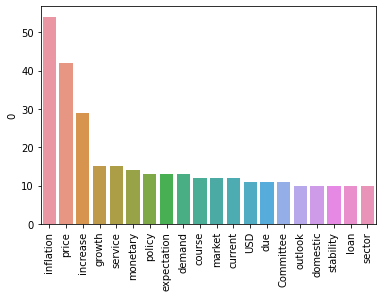

In [9]:
def freq_bar_plot(df,n):
    df=pd.DataFrame(tagged[0].value_counts()).head(n)
    df = result[result.index.isin(list(stopWords)) ==False].head(n)
    my_plot=sns.barplot(data=df, x=df.index, y=0)
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
    return my_plot
    plt.show()

freq_bar_plot(df=result,n=20)

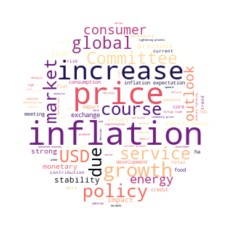

,0
inflation,54
price,42
point,34
rate,30
increase,29
...,...
zone,1
earthquake,1
show,1
reveals,1


In [10]:
#Circle 
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
def word_cloud(string, mask=mask):
    plt.axis("off")
    plt.imshow(WordCloud(background_color="white", stopwords=stopWords,width = 300, height = 300,
                         colormap = "magma",mask=mask).generate(string), interpolation="bilinear")
    plt.show()


a=re.sub(r'[^\w\s]', '', tagged[0].to_string().replace("\n",""))
word_cloud_plot=word_cloud(removing_digits(a))
result=pd.DataFrame(tagged[0].value_counts())
result